In [1]:
import datetime as dt
from mtgoScraper import *

if __name__ == '__main__':
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq='MS')

    startDate = dt.date(startDate.year, startDate.month, startDate.day)


    rawDeckLists = []
    for eachMonth in months:
        rawDeckLists += mtgoScrape.formatDeckList(queryFormat,eachMonth.year,eachMonth.month)

    skipUrls = []

    urlList = [x['url'] for x in rawDeckLists if x['url'] not in skipUrls if x['date']>=startDate]

    deckList = mtgoScrape.mtgoScrapeMain(urlList)

In [ ]:
decks = [x.deckName for x in deckList]

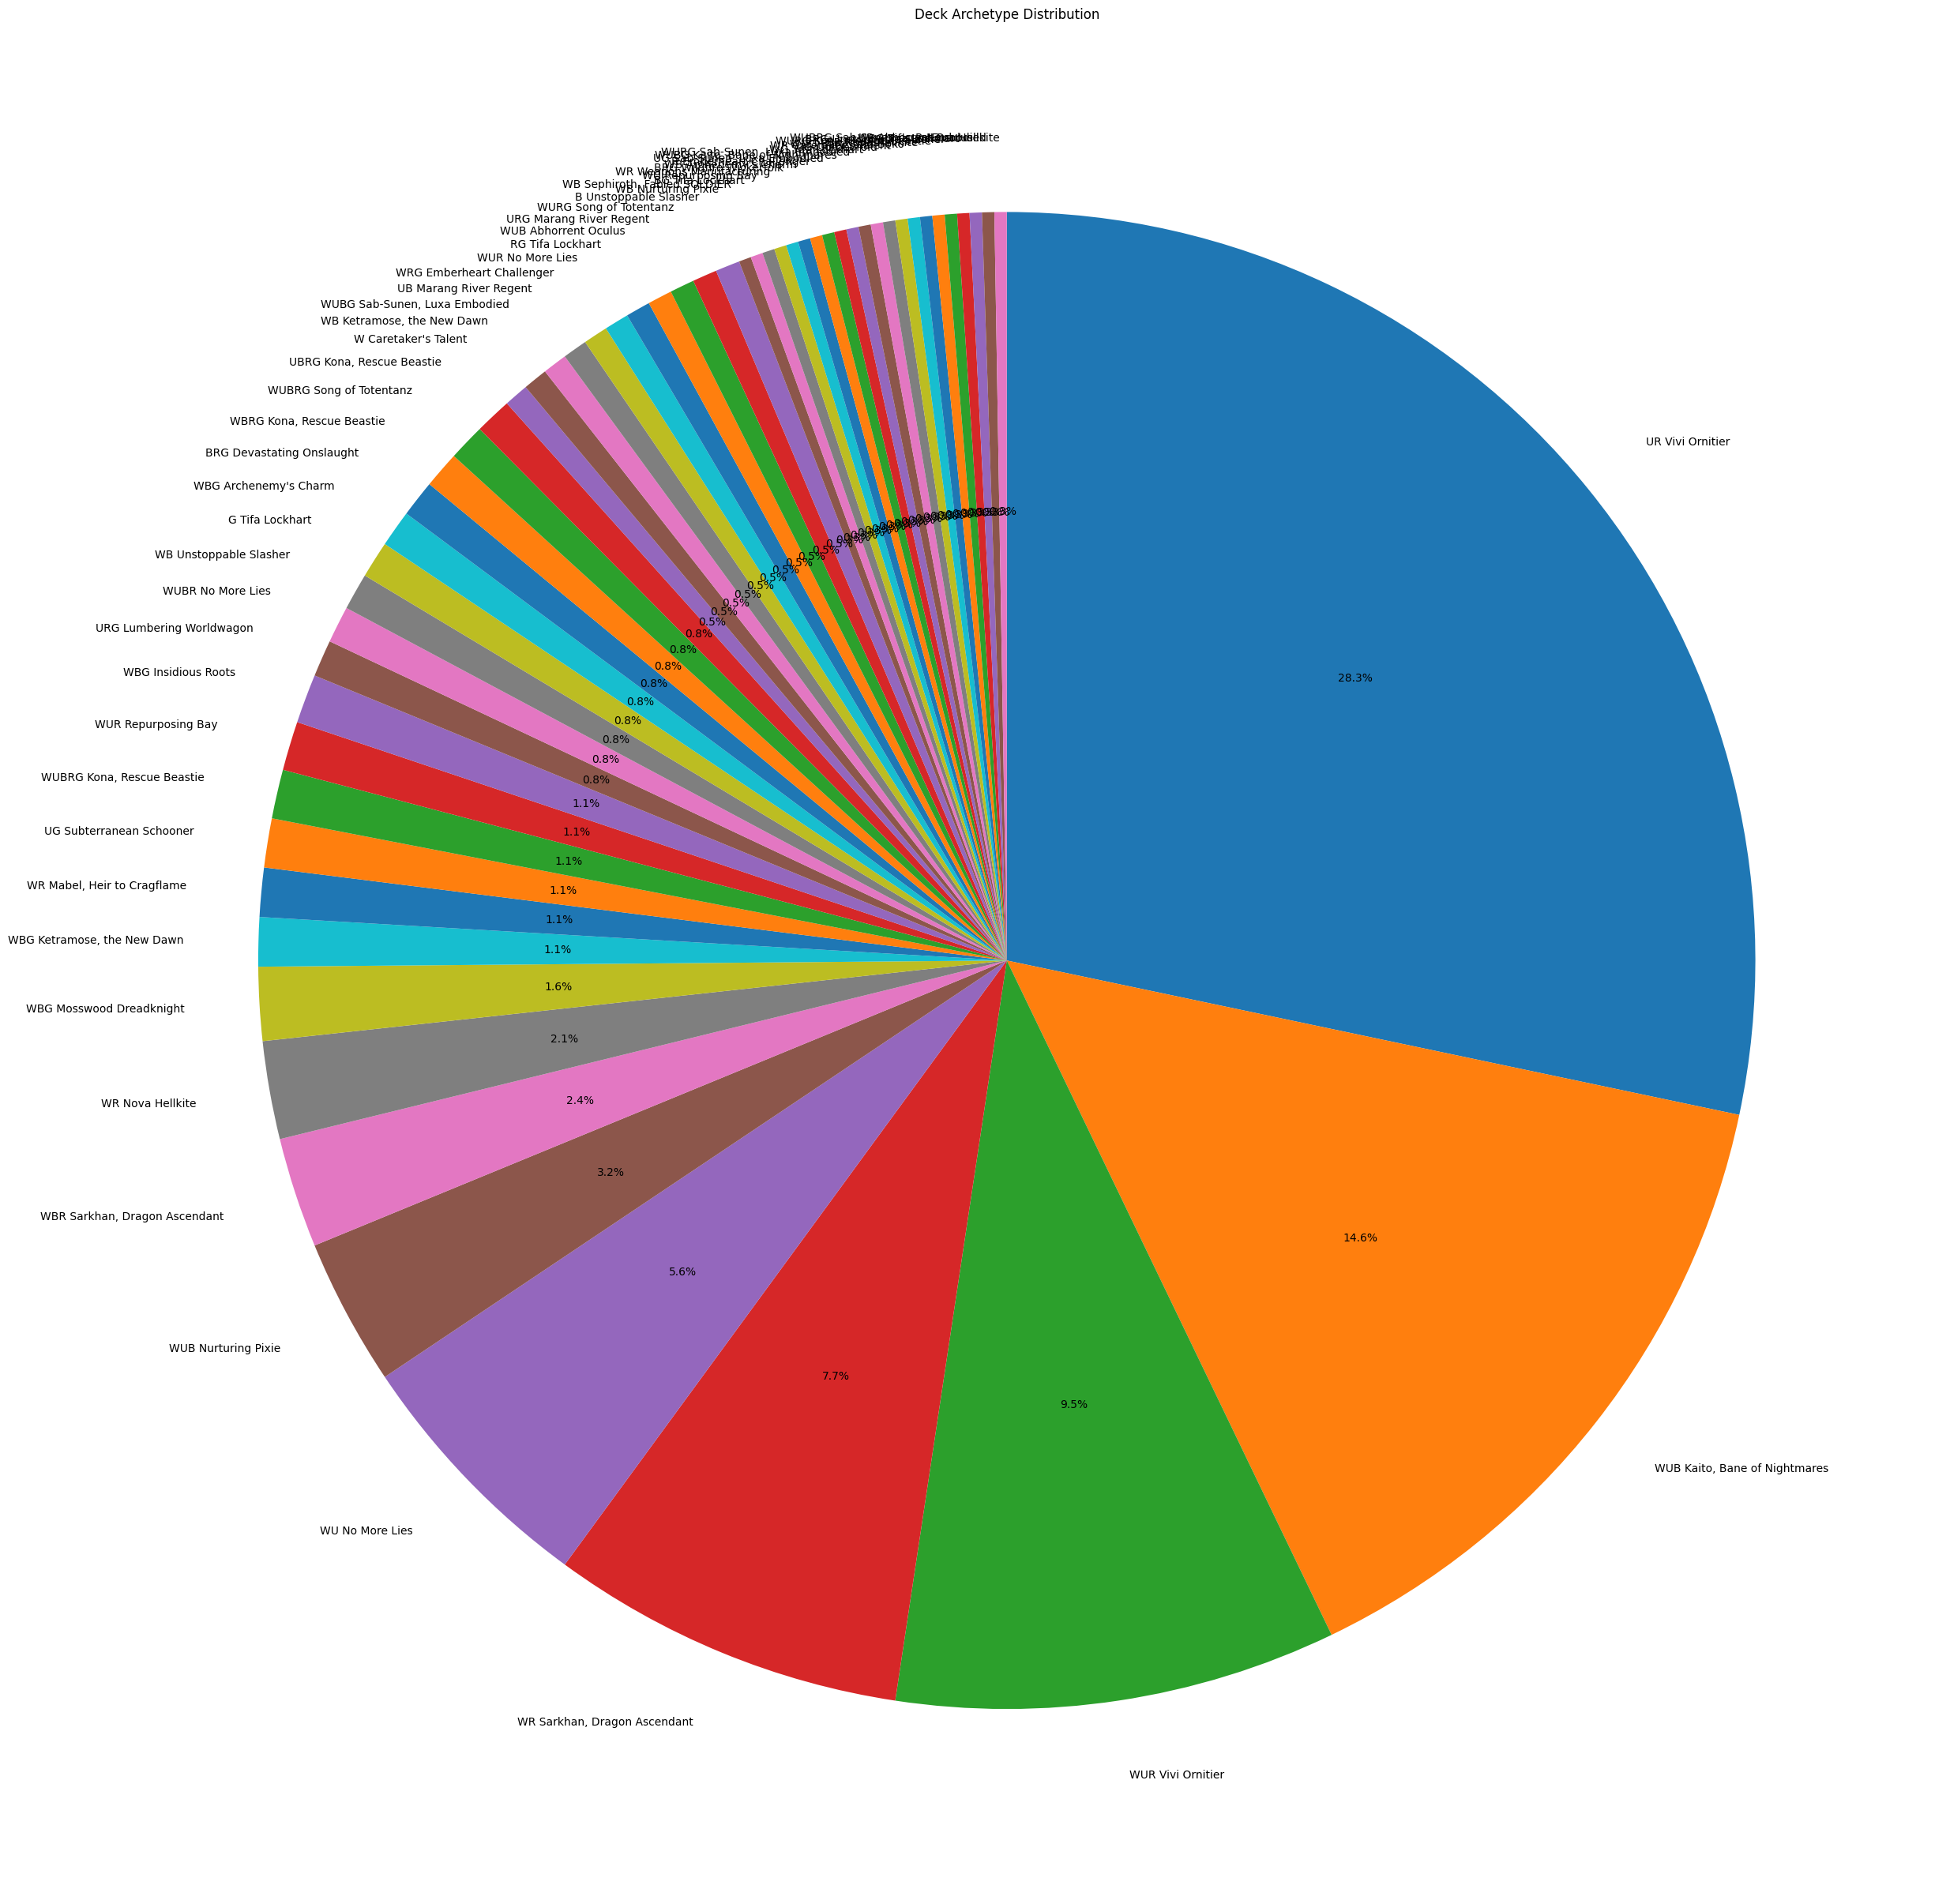

In [3]:
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
deck_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Deck Archetype Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()